<a href="https://colab.research.google.com/github/tintubiel/CV_course/blob/main/Image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Preprocessing & Computer Vision Course


In [175]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.cbook import file_requires_unicode
import numpy as np
import matplotlib.pyplot as plt

### **1. Используя пакет numpy перевести изображение в градации серого (grayscaled).**


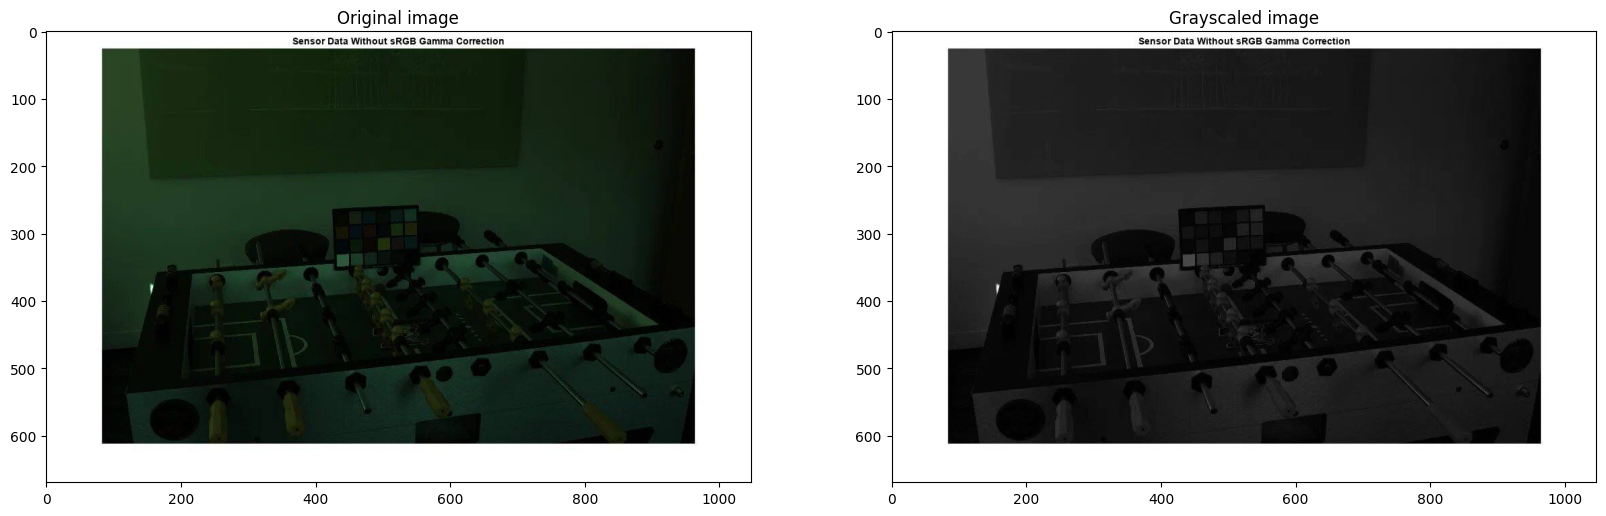

In [179]:
def rgb2gray(image):
    return np.dot(image[:,:,:3], [0.299, 0.587, 0.114])

fig, axes = plt.subplots(1,2, figsize =(20,20))

image = plt.imread('image.jpg')
gray_image = rgb2gray(image)

axes[0].imshow(image)
axes[0].set_title('Original image')

axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title('Grayscaled image')

plt.show()

### **2. Используя пакет numpy провести линейную коррекцию изображения, полученного в пункте 1.**

Цель – получить гистограмму серого, имеющую, по возможности, непустые корзины по все оси x.

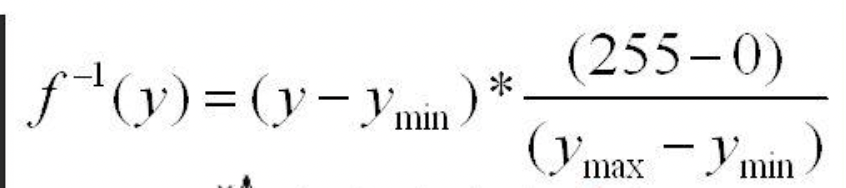

210447


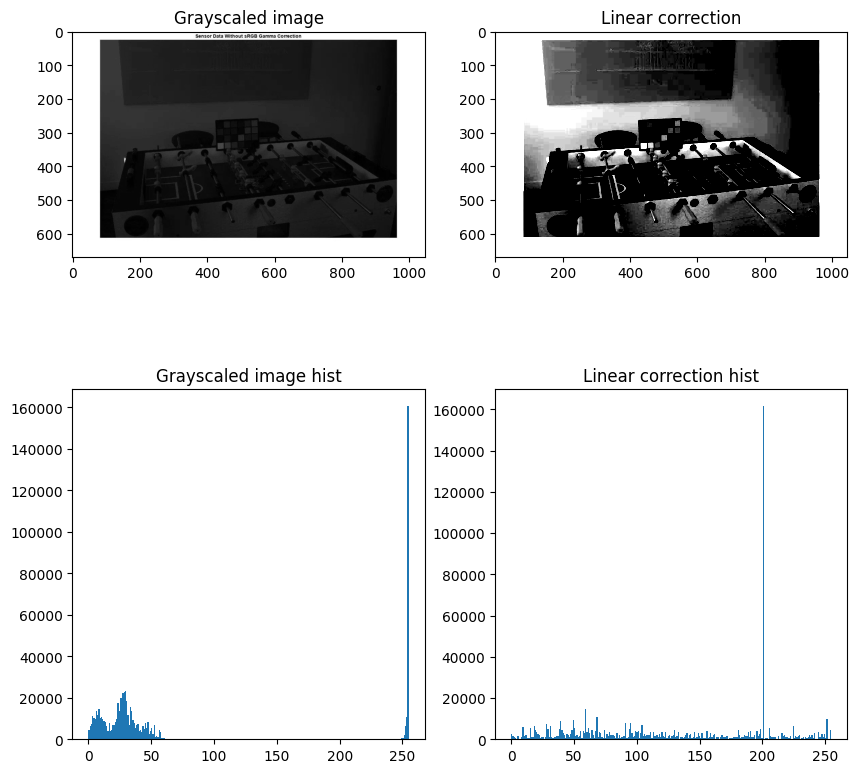

In [167]:
k = round(gray_image.size * 0.3)
print(k)# Отбросим k пикселей самых светлых и k пикселей самых тёмных

extended_img = gray_image.flatten()
extended_img.sort()
xmin = extended_img[k+1]
xmax = extended_img[-(k+1)]
img_corrected = (gray_image - xmin) * (255 / (xmax - xmin))

fig, axes = plt.subplots(2,2, figsize =(10,10))

axes[0][0].imshow(gray_image, cmap='gray', vmin=0, vmax=255)
axes[0][0].set_title('Grayscaled image')

axes[0][1].imshow(img_corrected, cmap='gray', vmin=0, vmax=255)
axes[0][1].set_title('Linear correction')

axes[1][0].hist(gray_image.flatten().astype('uint8'), bins=256)
axes[1][0].set_title('Grayscaled image hist')

axes[1][1].hist(img_corrected.flatten().astype('uint8'), bins=256)
axes[1][1].set_title('Linear correction hist')
plt.show()

### **3. Используя пакет numpy увеличить резкость изображения, полученного в пункте 1.**

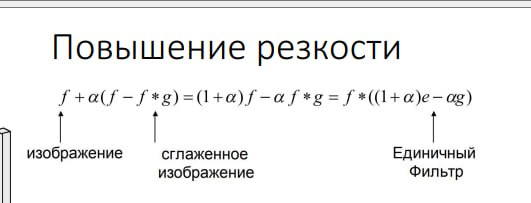

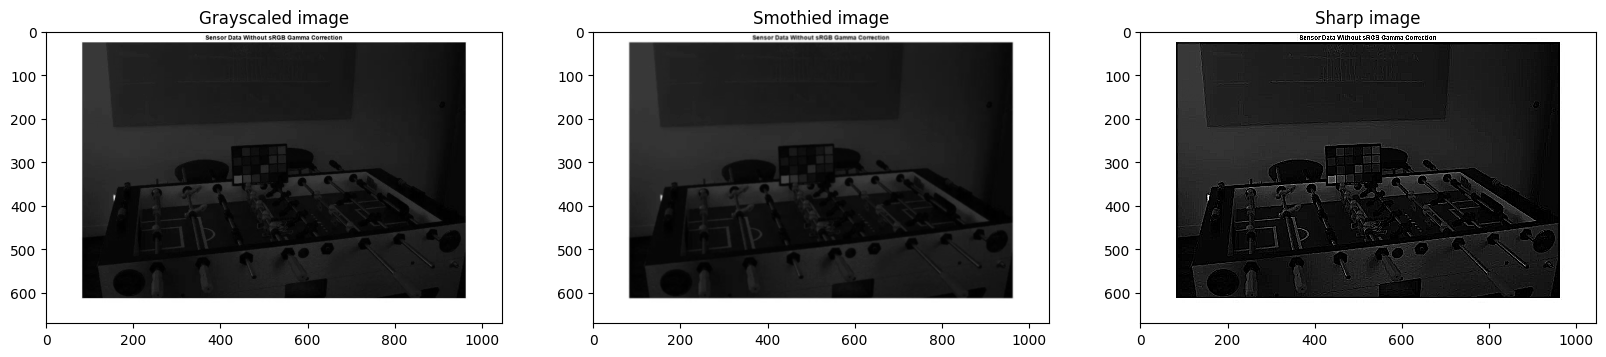

In [184]:
alpha = 10
gauss_kernel = np.array([[1, 4, 7, 4, 1],
                        [4, 16, 26, 16, 4],
                        [7, 26, 41, 26, 7],
                        [4, 16, 26, 16, 4],
                        [1, 4, 7, 4, 1]])/273
smothie = cv2.filter2D(gray_image, -1, gauss_kernel, borderType=cv2.BORDER_REPLICATE)
sharp = gray_image + alpha*(gray_image - smothie)

fig, axes = plt.subplots(1,3, figsize =(20,20))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Grayscaled image')

axes[1].imshow(smothie, cmap='gray')
axes[1].set_title('Smothied image')

axes[2].imshow(sharp, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Sharp image')

plt.show()

### **4. Используя пакет numpy сформировать изображение, имеющее заданный спектр.**

Точки с координатами: (0, 0), (0, 5), (0, -5), (50, 0), (-50, 0)


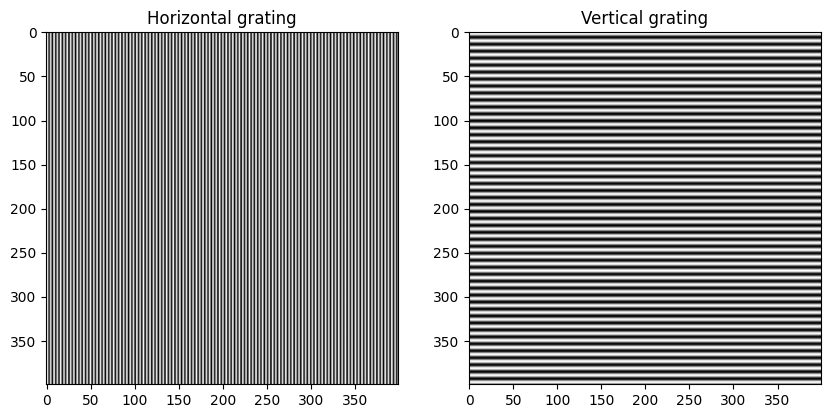

In [183]:
x = np.arange(-200, 200, 1)
X, Y = np.meshgrid(x, x)

freq = 50
grating1 = np.cos((X * freq)/(2 * np.pi))

freq = 5
grating2 = np.cos((Y * freq)/(2 * np.pi))

fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(grating1)
axes[0].set_title('Horizontal grating')

axes[1].imshow(grating2)
axes[1].set_title('Vertical grating')

plt.show()

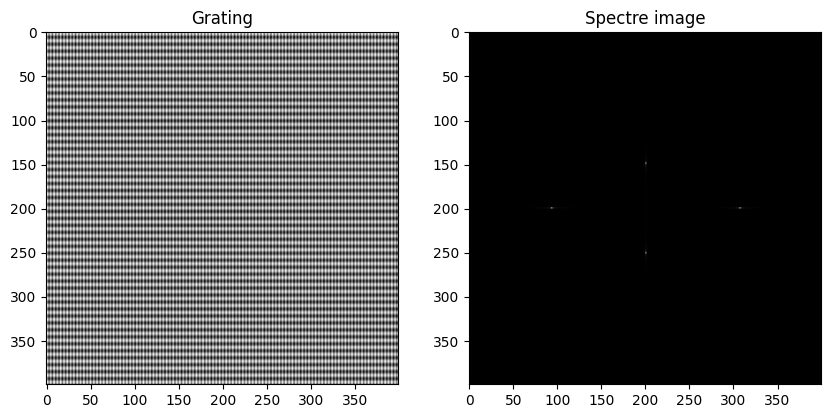

In [182]:
ft = np.fft.ifftshift(grating1 + grating2)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(grating1 + grating2)
axes[0].set_title('Grating')

axes[1].imshow(abs(ft))
axes[1].set_title('Spectre image')

plt.show()